In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # Block 1
        self.block1_conv1 = nn.Conv2d(12, 10, kernel_size=3, padding=1)
        self.block1_conv2 = nn.Conv2d(10, 10, kernel_size=3, padding=1)
        self.block1_bn = nn.BatchNorm2d(10)
        self.block1_alpha = nn.Conv2d(12, 10, kernel_size=3, padding=1)
        self.block1_beta = nn.Conv2d(12, 10, kernel_size=3, padding=1)
        self.block1_upsample = nn.ConvTranspose2d(10,10, kernel_size=2, stride=2)

        # Block 2
        self.block2_conv1 = nn.Conv2d(10, 8, kernel_size=3, padding=1)
        self.block2_conv2 = nn.Conv2d(8, 8, kernel_size=3, padding=1)
        self.block2_bn = nn.BatchNorm2d(8) #8 16 12
        self.block2_ic_up1 = nn.ConvTranspose2d(12, 8, kernel_size=2, stride=2) #8 16 12
        self.block2_alpha = nn.Conv2d(8, 8, kernel_size=3, padding=1) #8 16 12
        self.block2_beta = nn.Conv2d(8, 8, kernel_size=3, padding=1) #8 16 12
        self.block2_upsample = nn.ConvTranspose2d(8, 8, kernel_size=2, stride=2)

        # Block 3
        self.block3_conv1 = nn.Conv2d(8, 6, kernel_size=3, padding=1)
        self.block3_conv2 = nn.Conv2d(6, 6, kernel_size=3, padding=1)
        self.block3_bn = nn.BatchNorm2d(6)
        self.block3_ic_up1 = nn.ConvTranspose2d(12, 8, kernel_size=2, stride=2)
        self.block3_ic_up2 = nn.ConvTranspose2d(8, 6, kernel_size=2, stride=2)
        self.block3_alpha = nn.Conv2d(6, 6, kernel_size=3, padding=1)
        self.block3_beta = nn.Conv2d(6, 6, kernel_size=3, padding=1)
        self.block3_upsample = nn.ConvTranspose2d(6, 6, kernel_size=2, stride=2)

        # Block 4
        self.block4_conv1 = nn.Conv2d(6, 4, kernel_size=3, padding=1)
        self.block4_conv2 = nn.Conv2d(4, 4, kernel_size=3, padding=1)
        self.block4_bn = nn.BatchNorm2d(4)
        self.block4_ic_up1 = nn.ConvTranspose2d(12, 8, kernel_size=2, stride=2)
        self.block4_ic_up2 = nn.ConvTranspose2d(8, 6, kernel_size=2, stride=2)
        self.block4_ic_up3 = nn.ConvTranspose2d(6, 4, kernel_size=2, stride=2)
        self.block4_alpha = nn.Conv2d(4, 4, kernel_size=3, padding=1)
        self.block4_beta = nn.Conv2d(4, 4, kernel_size=3, padding=1)
        self.block4_upsample = nn.ConvTranspose2d(4, 4, kernel_size=2, stride=2)

        # Block 5
        self.block5_conv1 = nn.Conv2d(4, 3, kernel_size=3, padding=1)
        self.block5_conv2 = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block5_bn = nn.BatchNorm2d(3)
        self.block5_ic_up1 = nn.ConvTranspose2d(12, 8, kernel_size=2, stride=2)
        self.block5_ic_up2 = nn.ConvTranspose2d(8, 6, kernel_size=2, stride=2)
        self.block5_ic_up3 = nn.ConvTranspose2d(6, 4, kernel_size=2, stride=2)
        self.block5_ic_up4 = nn.ConvTranspose2d(4, 3, kernel_size=2, stride=2)
        self.block5_alpha = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block5_beta = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block5_upsample = nn.ConvTranspose2d(3, 3, kernel_size=2, stride=2)

        # Block 6
        self.block6_conv1 = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block6_conv2 = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block6_bn = nn.BatchNorm2d(3)
        self.block6_ic_up1 = nn.ConvTranspose2d(12, 8, kernel_size=2, stride=2)
        self.block6_ic_up2 = nn.ConvTranspose2d(8, 6, kernel_size=2, stride=2)
        self.block6_ic_up3 = nn.ConvTranspose2d(6, 4, kernel_size=2, stride=2)
        self.block6_ic_up4 = nn.ConvTranspose2d(4, 3, kernel_size=2, stride=2)
        self.block6_ic_up5 = nn.ConvTranspose2d(3, 3, kernel_size=2, stride=2)
        self.block6_alpha = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block6_beta = nn.Conv2d(3, 3, kernel_size=3, padding=1)
        self.block6_upsample = nn.ConvTranspose2d(3, 3, kernel_size=2, stride=2)



    def forward(self, x):
        # Block 1
        x1 = F.relu(self.block1_conv1(x))
        x1 = F.relu(self.block1_conv2(x1))
        x1_bn = self.block1_bn(x1)
        alpha1 = torch.relu(self.block1_alpha(x))
        beta1 = torch.tanh(self.block1_beta(x))
        x1_can = alpha1 * x1_bn + beta1
        out1 = self.block1_upsample(x1_can + x1)

        # Block 2
        x2 = F.relu(self.block2_conv1(out1))
        x2 = F.relu(self.block2_conv2(x2))
        x2_bn = self.block2_bn(x2)
        ic2 = self.block2_ic_up1(x)
        alpha2 = torch.relu(self.block2_alpha(ic2))
        beta2 = torch.tanh(self.block2_beta(ic2))
        out2 = self.block2_upsample(alpha2 * x2_bn + beta2 + x2)

        # Block 3
        x3 = F.relu(self.block3_conv1(out2))
        x3 = F.relu(self.block3_conv2(x3))
        x3_bn = self.block3_bn(x3)
        ic3 = self.block3_ic_up1(x)
        ic3 = self.block3_ic_up2(ic3)
        alpha3 = torch.relu(self.block3_alpha(ic3))
        beta3 = torch.tanh(self.block3_beta(ic3))
        out3 = self.block3_upsample(alpha3 * x3_bn + beta3 + x3)

        # Block 4
        x4 = F.relu(self.block4_conv1(out3))
        x4 = F.relu(self.block4_conv2(x4))
        x4_bn = self.block4_bn(x4)
        ic4 = self.block4_ic_up1(x)
        ic4 = self.block4_ic_up2(ic4)
        ic4 = self.block4_ic_up3(ic4)
        alpha4 = torch.relu(self.block4_alpha(ic4))
        beta4 = torch.tanh(self.block4_beta(ic4))
        out4 = self.block4_upsample(alpha4 * x4_bn + beta4 + x4)

        # Block 5
        x5 = F.relu(self.block5_conv1(out4))
        x5 = F.relu(self.block5_conv2(x5))
        x5_bn = self.block5_bn(x5)
        ic5 = self.block5_ic_up1(x)
        ic5 = self.block5_ic_up2(ic5)
        ic5 = self.block5_ic_up3(ic5)
        ic5 = self.block5_ic_up4(ic5)
        alpha5 = torch.relu(self.block5_alpha(ic5))
        beta5 = torch.tanh(self.block5_beta(ic5))
        out5 = self.block5_upsample(alpha5 * x5_bn + beta5 + x5)

        # Block 6
        x6 = F.relu(self.block6_conv1(out5))
        x6 = F.relu(self.block6_conv2(x6))
        x6_bn = self.block6_bn(x6)
        ic6 = self.block6_ic_up1(x)
        ic6 = self.block6_ic_up2(ic6)
        ic6 = self.block6_ic_up3(ic6)
        ic6 = self.block6_ic_up4(ic6)
        ic6 = self.block6_ic_up5(ic6)
        alpha6 = torch.relu(self.block6_alpha(ic6))
        beta6 = torch.tanh(self.block6_beta(ic6))
        out6 = self.block6_upsample(alpha6 * x6_bn + beta6 + x6)
        
        return out6

In [2]:
from torch.utils.data import Dataset
import os
from PIL import Image
from torchvision import transforms
import torch
from torchvision.transforms import ToTensor, Resize

class GMMDataset(Dataset):
    def __init__(self, names):
        self.names = names

        self.segm_dir = '/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-v3'
        self.person_dir = '/kaggle/input/high-resolution-viton-zalando-dataset/test/image'
        self.cloth_dir = '/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth'
        self.deformed_dir = '/kaggle/input/deformed-clothes/deformed_cloth_test_png'
        self.agnostic_dir = '/kaggle/input/high-resolution-viton-zalando-dataset/test/agnostic-v3.2'

        self.transform = transforms.Compose([
            transforms.Resize((8, 6)),
            transforms.ToTensor(),
        ])

        self.person_transform = transforms.Compose([
            transforms.Resize((512, 384)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.names)
        
    def __getitem__(self, idx):
        name = self.names[idx]
    
        # Apply full transform to inputs used in Ic
        segm = self.transform(Image.open(os.path.join(self.segm_dir, name + '.png')).convert('RGB'))
        cloth = self.transform(Image.open(os.path.join(self.cloth_dir, name + '.jpg')).convert('RGB'))
        y = self.transform(Image.open(os.path.join(self.deformed_dir, name + '.png')).convert('RGB'))
        agnostic = self.transform(Image.open(os.path.join(self.agnostic_dir, name + '.jpg')).convert('RGB'))
    
        # Resize and convert person image to tensor
        person_img = Image.open(os.path.join(self.person_dir, name + '.jpg')).convert('RGB')
        person = self.person_transform(person_img)  # Shape: [3, 512, 334]
    
        # Concatenate to form Ic
        Ic = torch.cat([segm, cloth, y, agnostic], dim=0)
    
        return Ic, person


In [3]:
from sklearn.model_selection import train_test_split
import glob
import os

# Get all base names from image dir
image_dir = '/kaggle/input/high-resolution-viton-zalando-dataset/test/image'
all_image_paths = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
all_names = [os.path.basename(p).split('.')[0] for p in all_image_paths]

# Split: 80% train, 20% val
train_names, val_names = train_test_split(all_names, test_size=0.2, random_state=42)

In [4]:
from torch.utils.data import DataLoader

train_dataset = GMMDataset(train_names)
val_dataset = GMMDataset(val_names)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=2)

In [5]:
import torchvision.models as models
import torch.nn as nn

class Vgg19(nn.Module):
    def __init__(self, requires_grad=False):
        super(Vgg19, self).__init__()
        vgg_pretrained_features = models.vgg19(pretrained=True).features
        self.slice1 = nn.Sequential()
        self.slice2 = nn.Sequential()
        self.slice3 = nn.Sequential()
        self.slice4 = nn.Sequential()
        self.slice5 = nn.Sequential()
        for x in range(2):
            self.slice1.add_module(str(x), vgg_pretrained_features[x])
        for x in range(2, 7):
            self.slice2.add_module(str(x), vgg_pretrained_features[x])
        for x in range(7, 12):
            self.slice3.add_module(str(x), vgg_pretrained_features[x])
        for x in range(12, 21):
            self.slice4.add_module(str(x), vgg_pretrained_features[x])
        for x in range(21, 30):
            self.slice5.add_module(str(x), vgg_pretrained_features[x])
        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, X):
        h_relu1 = self.slice1(X)
        h_relu2 = self.slice2(h_relu1)
        h_relu3 = self.slice3(h_relu2)
        h_relu4 = self.slice4(h_relu3)
        h_relu5 = self.slice5(h_relu4)
        out = [h_relu1, h_relu2, h_relu3, h_relu4, h_relu5]
        return out

In [6]:
import torch
import torch.nn as nn

class PerceptualLoss(nn.Module):
    def __init__(self, vgg_model, weights=None):
        super(PerceptualLoss, self).__init__()
        self.vgg = vgg_model
        self.weights = weights or [1.0, 1.0, 1.0, 1.0, 1.0]
        self.criterion = nn.L1Loss()

    def forward(self, x, y):
        # Assume x and y are already in correct VGG input range (e.g., [0, 1])
        x_vgg = self.vgg(x)
        y_vgg = self.vgg(y)

        loss = 0.0
        for i in range(len(x_vgg)):
            loss += self.weights[i] * self.criterion(x_vgg[i], y_vgg[i])
        return loss

In [7]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

l1_loss_fn = nn.L1Loss()
vgg_model = Vgg19().to(device)
perceptual_loss_fn = PerceptualLoss(vgg_model).to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 186MB/s]  


In [8]:
# ✅ Combined loss function
def combined_loss(output, target, alpha=0.5):
    l1 = l1_loss_fn(output, target)
    perceptual = perceptual_loss_fn(output, target)
    return alpha * l1 + (1 - alpha) * perceptual

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import os

# -----------------------
# ✅ Setup
# -----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Instantiate model
model = Generator().to(device)

# ✅ Loss function (already defined)
# l1_loss_fn, perceptual_loss_fn, combined_loss already set up in your code

# ✅ Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.5, 0.999))

# ✅ LR Scheduler (optional but useful)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# ✅ Directory to save best model
os.makedirs('checkpoints', exist_ok=True)
best_val_loss = float('inf')
save_path = '/kaggle/working/best_generator.pth'

# -----------------------
# ✅ Training Loop
# -----------------------
num_epochs = 30  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for Ic, person in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        Ic, person = Ic.to(device), person.to(device)

        optimizer.zero_grad()
        output = model(Ic)

        loss = combined_loss(output, person)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * Ic.size(0)

    train_loss /= len(train_loader.dataset)

    # -----------------------
    # ✅ Validation
    # -----------------------
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for Ic, person in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            Ic, person = Ic.to(device), person.to(device)

            output = model(Ic)
            loss = combined_loss(output, person)

            val_loss += loss.item() * Ic.size(0)

    val_loss /= len(val_loader.dataset)

    # -----------------------
    # ✅ Logging and Scheduler
    # -----------------------
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    scheduler.step(val_loss)

    # -----------------------
    # ✅ Save Best Model
    # -----------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': val_loss
        }, save_path)
        print(f"✅ Saved best model at epoch {epoch+1} with val loss: {val_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 1 | Train Loss: 1.1128 | Val Loss: 0.9140
✅ Saved best model at epoch 1 with val loss: 0.9140


Epoch 2/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 2 | Train Loss: 0.8863 | Val Loss: 0.8410
✅ Saved best model at epoch 2 with val loss: 0.8410


Epoch 3/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 3 | Train Loss: 0.8091 | Val Loss: 0.7577
✅ Saved best model at epoch 3 with val loss: 0.7577


Epoch 4/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 4 | Train Loss: 0.7212 | Val Loss: 0.6773
✅ Saved best model at epoch 4 with val loss: 0.6773


Epoch 5/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 5 | Train Loss: 0.6737 | Val Loss: 0.6576
✅ Saved best model at epoch 5 with val loss: 0.6576


Epoch 6/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 6 | Train Loss: 0.6672 | Val Loss: 0.6558
✅ Saved best model at epoch 6 with val loss: 0.6558


Epoch 7/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.19it/s]


Epoch 7 | Train Loss: 0.6661 | Val Loss: 0.6550
✅ Saved best model at epoch 7 with val loss: 0.6550


Epoch 8/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 8 | Train Loss: 0.6654 | Val Loss: 0.6548
✅ Saved best model at epoch 8 with val loss: 0.6548


Epoch 9/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 9 | Train Loss: 0.6649 | Val Loss: 0.6541
✅ Saved best model at epoch 9 with val loss: 0.6541


Epoch 10/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 10 | Train Loss: 0.6645 | Val Loss: 0.6538
✅ Saved best model at epoch 10 with val loss: 0.6538


Epoch 11/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 11 | Train Loss: 0.6642 | Val Loss: 0.6536
✅ Saved best model at epoch 11 with val loss: 0.6536


Epoch 12/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 12 | Train Loss: 0.6639 | Val Loss: 0.6534
✅ Saved best model at epoch 12 with val loss: 0.6534


Epoch 13/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 13 | Train Loss: 0.6637 | Val Loss: 0.6532
✅ Saved best model at epoch 13 with val loss: 0.6532


Epoch 14/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 14 | Train Loss: 0.6635 | Val Loss: 0.6528
✅ Saved best model at epoch 14 with val loss: 0.6528


Epoch 15/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 15 | Train Loss: 0.6632 | Val Loss: 0.6527
✅ Saved best model at epoch 15 with val loss: 0.6527


Epoch 16/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 16 | Train Loss: 0.6629 | Val Loss: 0.6527


Epoch 17/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 17 | Train Loss: 0.6626 | Val Loss: 0.6519
✅ Saved best model at epoch 17 with val loss: 0.6519


Epoch 18/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 18 | Train Loss: 0.6624 | Val Loss: 0.6519


Epoch 19/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 19 | Train Loss: 0.6621 | Val Loss: 0.6518
✅ Saved best model at epoch 19 with val loss: 0.6518


Epoch 20/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 20 | Train Loss: 0.6619 | Val Loss: 0.6516
✅ Saved best model at epoch 20 with val loss: 0.6516


Epoch 21/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 21 | Train Loss: 0.6617 | Val Loss: 0.6512
✅ Saved best model at epoch 21 with val loss: 0.6512


Epoch 22/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 22 | Train Loss: 0.6613 | Val Loss: 0.6508
✅ Saved best model at epoch 22 with val loss: 0.6508


Epoch 23/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 23 | Train Loss: 0.6609 | Val Loss: 0.6501
✅ Saved best model at epoch 23 with val loss: 0.6501


Epoch 24/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.19it/s]


Epoch 24 | Train Loss: 0.6599 | Val Loss: 0.6482
✅ Saved best model at epoch 24 with val loss: 0.6482


Epoch 25/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 25 | Train Loss: 0.6575 | Val Loss: 0.6456
✅ Saved best model at epoch 25 with val loss: 0.6456


Epoch 26/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


Epoch 26 | Train Loss: 0.6546 | Val Loss: 0.6423
✅ Saved best model at epoch 26 with val loss: 0.6423


Epoch 27/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 27 | Train Loss: 0.6510 | Val Loss: 0.6380
✅ Saved best model at epoch 27 with val loss: 0.6380


Epoch 28/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 28 | Train Loss: 0.6479 | Val Loss: 0.6356
✅ Saved best model at epoch 28 with val loss: 0.6356


Epoch 29/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


Epoch 29 | Train Loss: 0.6454 | Val Loss: 0.6328
✅ Saved best model at epoch 29 with val loss: 0.6328


Epoch 30/30 - Validation: 100%|██████████| 204/204 [00:24<00:00,  8.18it/s]

Epoch 30 | Train Loss: 0.6430 | Val Loss: 0.6315
✅ Saved best model at epoch 30 with val loss: 0.6315


In [16]:
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

def predict_and_show(model, dataloader, device, num_samples=5):
    """
    Predicts and displays model output vs ground truth.

    Parameters:
    - model: trained PyTorch model
    - dataloader: DataLoader containing (Ic, person) pairs
    - device: "cuda" or "cpu"
    - num_samples: number of predictions to visualize
    """
    model.eval()
    shown = 0

    with torch.no_grad():
        for Ic, person in dataloader:
            Ic, person = Ic.to(device), person.to(device)
            output = model(Ic)

            for i in range(Ic.size(0)):
                pred = output[i].cpu().squeeze().clamp(0, 1)  # shape: [1, H, W] or [3, H, W]
                gt = person[i].cpu().clamp(0, 1)              # shape: [3, H, W]

                # Convert to PIL image
                pred_img = to_pil_image(pred)
                gt_img = to_pil_image(gt)

                # Plot side-by-side
                fig, axs = plt.subplots(1, 2, figsize=(5, 3))
                axs[0].imshow(pred_img)
                axs[0].set_title("Predicted Output")
                axs[0].axis('off')

                axs[1].imshow(gt_img)
                axs[1].set_title("Ground Truth")
                axs[1].axis('off')

                plt.tight_layout()
                plt.show()

                shown += 1
                if shown >= num_samples:
                    return


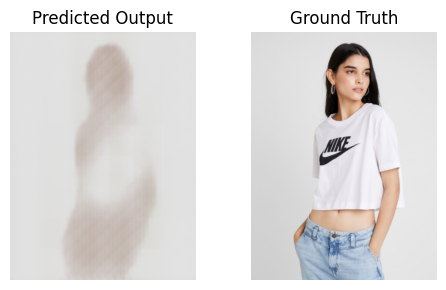

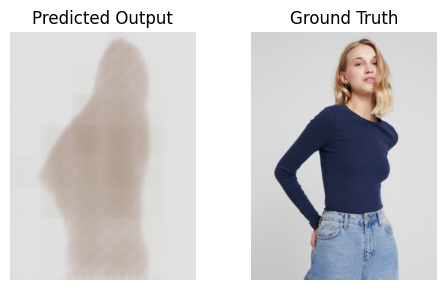

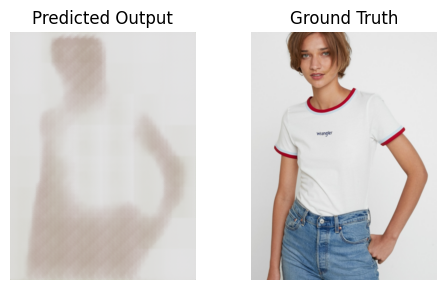

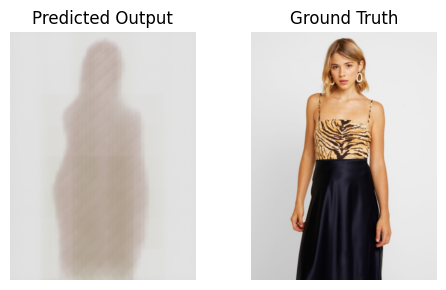

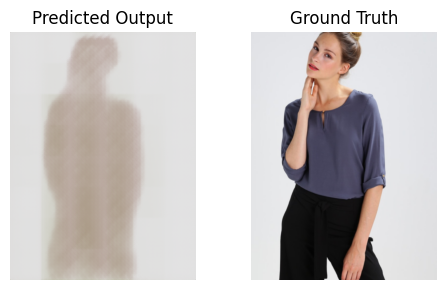

In [17]:
# Load the best model checkpoint
checkpoint = torch.load('/kaggle/working/best_generator.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

# Show 5 prediction vs ground truth pairs
predict_and_show(model, val_loader, device, num_samples=5)